# MATH 525 - Statistics I, Fall 2021
## Assignment 1 - Konstantinos Georgiou
Due: Sunday, September 12, by 8:00PM

## Initializations

In [ ]:
# (For Google Collab) Mount Google Drive and set working directory
from google.colab import drive
import os
# Mount Google Drive
drive.mount('/content/drive')
# Set working directory
project_path = '/content/drive/MyDrive/Documents/Work Documents/UTK/Courses/MATH525/Assignments/Assignment 1'
os.chdir(project_path)
print(os.listdir(project_path))

Mounted at /content/drive
['assigment_1_template.pdf', 'assignment_1 (1).pdf', 'assignment_1.pdf', 'data', 'MATH525_Assignment1_KonstantinosGeorgiou.pdf', 'MATH525_Assignment1_KonstantinosGeorgiou.zip', 'GRADED_MATH525_Assignment1_KonstantinosGeorgiou.pdf', 'MATH525_Assignment1_KonstantinosGeorgiou.ipynb']


In [ ]:
# Imports
import numpy as np
from scipy.io import loadmat
from scipy import stats
from scipy.optimize import fminbound, fmin
from scipy.special import erfc
import matplotlib as mpl
from matplotlib import pyplot as plt
from typing import *

## Load Data & Exploration

In [ ]:
# Load datasets
print(os.listdir('/content/drive/MyDrive/Documents/Work Documents/UTK/Courses/MATH525/Assignments/Assignment 1/data'))
vis_data = loadmat('data/vis_data.mat')
tttr_calibration = loadmat('data/TTTR_calibration.mat')
tttr_experiment = loadmat('data/TTTR_experiment.mat')

['TTTR_calibration.mat', 'TTTR_experiment.mat', 'vis_data (1).mat', 'vis_data.mat']


In [ ]:
# Data exploration
# Vis Data
print("--------\nComponents of Vis Data: ", vis_data.keys())
vis_data_W = vis_data['W']
print(f"Vis Data W:\n\tType: {vis_data_W.dtype}, Shape: {vis_data_W.shape}")
print(f"\tFirst row: {vis_data_W[1, :]}")
# TTTR Calibration
print("--------\nComponents of TTTR Calibration: ", tttr_calibration.keys())
tttr_calibration_w = tttr_calibration['w']
print(f"TTTR Calibration w:\n\tType: {tttr_calibration_w.dtype}, Shape: {tttr_calibration_w.shape}")
print(f"\tFirst row: {tttr_calibration_w[1, :]}")
# TTTR Experiment
print("--------\nComponents of TTTR Experiment: ", tttr_calibration.keys())
tttr_experiment_w = tttr_experiment['w']
print(f"TTTR Experiment w:\n\tType: {tttr_experiment_w.dtype}, Shape: {tttr_experiment_w.shape}")
print(f"\tFirst row: {tttr_experiment_w[1, :]}")

--------
Components of Vis Data:  dict_keys(['__header__', '__version__', '__globals__', 'W'])
Vis Data W:
	Type: float64, Shape: (538, 3)
	First row: [ 0.54184101 -0.05661396  0.06715956]
--------
Components of TTTR Calibration:  dict_keys(['__header__', '__version__', '__globals__', 'w'])
TTTR Calibration w:
	Type: float64, Shape: (12500, 1)
	First row: [1.51189253]
--------
Components of TTTR Experiment:  dict_keys(['__header__', '__version__', '__globals__', 'w'])
TTTR Experiment w:
	Type: float64, Shape: (349, 1)
	First row: [2.28196686]


## Problem 1 - Visualize all components of the provided dataset (vis_data.mat)

In [ ]:
# Create a 3x3 grid of plots
%%capture out
fig, ax = plt.subplots(3, 3, figsize=(13, 9))
plot_color = 'royalblue'

In [ ]:
# Histogram of W1
ax[0][0].hist(vis_data_W[:, 0], density=False, bins=20, color=plot_color, edgecolor='black', linewidth=0.5)  # density=False would make counts
ax[0][0].set_xticks(np.arange(-0.5, 2.0, 0.5))
ax[0][0].set_yticks(np.arange(0, 70, 20))
ax[0][0].set_title('$\mathregular{W_1}$', fontweight='bold')
ax[0][0].margins(0.1) # 1% padding in all directions

In [ ]:
# W1-W2 Scatter Plot
ax[1][0].scatter(vis_data_W[:, 0], vis_data_W[:, 1], color='royalblue', s=5)
ax[1][0].set_xticks(np.arange(-0.5, 2, 0.5))
ax[1][0].set_yticks(np.arange(0, 3, 1))
ax[1][0].set_ylabel('$\mathregular{W_2}$')
ax[1][0].margins(0.1) # 1% padding in all directions
ax[1][0].grid(True)
# W2 Scatter Plot
ax[1][1].hist(vis_data_W[:, 1], density=False, bins=20, color=plot_color, edgecolor='black', linewidth=0.5)  # density=False would make counts
ax[1][1].set_xticks(np.arange(0, 3, 1))
ax[1][1].set_yticks(np.arange(0, 70, 20))
ax[1][1].set_title('$\mathregular{W_2}$', fontweight='bold')
ax[1][1].margins(0.1) # 1% padding in all directions

In [ ]:
# W1-W3 Scatter Plot
ax[2][0].scatter(vis_data_W[:, 0], vis_data_W[:, 2], color=plot_color, s=5)
ax[2][0].set_xticks(np.arange(-0.5, 2, 0.5))
ax[2][0].set_yticks(np.arange(0, 3, 1))
ax[2][0].set_xlabel('$\mathregular{W_1}$')
ax[2][0].set_ylabel('$\mathregular{W_3}$')
ax[2][0].margins(0.1) # 1% padding in all directions
ax[2][0].grid(True)
# W2-W3 Scatter Plot
ax[2][1].scatter(vis_data_W[:, 1], vis_data_W[:, 2], color=plot_color, s=5)
ax[2][1].set_xticks(np.arange(0, 3, 1))
ax[2][1].set_yticks(np.arange(0, 3, 1))
ax[2][1].set_xlabel('$\mathregular{W_2}$')
ax[2][1].margins(0.1) # 1% padding in all directions
ax[2][1].grid(True)
# W3 Histogram
ax[2][2].hist(vis_data_W[:, 2], density=False, bins=20, color=plot_color, edgecolor='black', linewidth=0.5)  # density=False would make counts
ax[2][2].set_xticks(np.arange(0, 3, 1))
ax[2][2].set_yticks(np.arange(0, 150, 50))
ax[2][2].set_xlabel('$\mathregular{W_3}$')
ax[2][2].set_title('$\mathregular{W_3}$', fontweight='bold')
ax[2][2].margins(0.1) # 1% padding in all directions

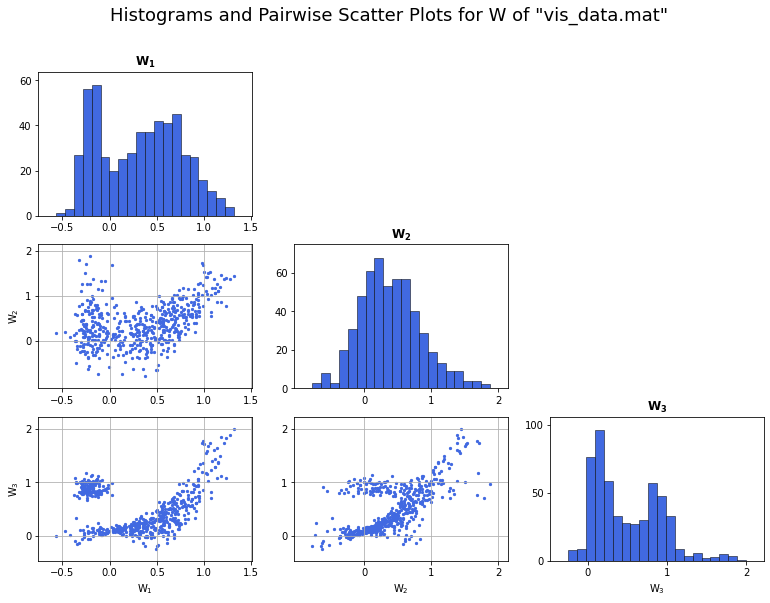

In [ ]:
# Delete Empty Plots
try:
  fig.delaxes(ax[0][1])
except KeyError:
  pass
try:
  fig.delaxes(ax[0][2])
except KeyError:
  pass
try:
  fig.delaxes(ax[1][2])
except KeyError:
  pass
# Show Plot
fig.suptitle('Histograms and Pairwise Scatter Plots for W of "vis_data.mat"', fontsize=18)
fig

## Problem 2 - Simulations

In [ ]:
def categorical(probabilities: Tuple[float], num_samples: int = 100, 
                uniform_range: Tuple = (0, 1)) -> np.ndarray:
  """ Categorical distribution simulation 
    Example: 
      Probabilities: (0.3, 0.3, 0.4)
      CDF: [0.3 0.6 1.]
      Generated Uniform: [0.44304039 0.35528165 0.13091962 0.82066043 0.18759588]
      Conditions List: 
        [array([ False, False,  True,  False,  True]), 
         array([ True,  True,  True,  False,  True]), 
         array([ True,  True,  True,  True,  True])]
      Choice List: 
        [array([0., 0., 0., 0., 0.]), 
         array([1., 1., 1., 1., 1.]), 
         array([2., 2., 2., 2., 2.])]
      New Distirbution: [1. 1. 0. 2. 0.]
  """

  # Evaluate that the probabilities are correct
  assert np.sum(probabilities) == 1
  for prob in probabilities:
    assert (prob>=0) and (prob<=1)
  # Calculate CDF
  num_categories = len(probabilities)
  probabilities = np.array(probabilities)
  cdf = np.cumsum(probabilities)
  # Ensure they add up to 1
  assert cdf[-1] == 1
  # Generate unifrom distribution in the desired range. Default: [0, 1]
  uniform = np.random.uniform(*uniform_range, size=num_samples)
  # Generate samples based on the cumulative sums of the probabilities
  condlist = [uniform <= limit for limit in cdf]  # True/False for categories X samples
  choicelist = [i* np.ones(num_samples) for i in range(num_categories)]  # Category index matrix with same dims as condlist  
  distirbution = np.select(condlist=condlist, choicelist=choicelist)  # Select from choicelist using condlist

  return distirbution

class Cauchy:
  def __init__(self, mu: float, sigma: float, 
               num_samples: int = 100, uniform_range: Tuple = (0, 1)) -> None:
    # Ensure sigma is positive
    assert sigma > 0
    self.mu = mu
    self.sigma = sigma
    self.distribution = None
    # Generate unifrom distribution in the desired range. Default: [0, 1]
    self.uniform = np.random.uniform(*uniform_range, size=num_samples)

  def get_dist(self) -> np.ndarray:
    """ Cauchy distribution simulation """

    # Generate samples based on Cauchy's Quantile function
    tan_term = np.tan(np.pi*(self.uniform-0.5))
    self.distribution = self.mu + self.sigma*self.sigma*tan_term

    return self.distribution

  def get_pdf(self) -> np.ndarray:
    if self.distribution is None:
      self.get_dist()

    denominator_first_term = np.pi*self.sigma
    denominator_second_term = 1+((self.distribution-self.mu)/self.sigma)**2
    denominator = denominator_first_term * denominator_second_term
    numerator = np.ones(denominator.shape[0])
    pdf = np.true_divide(numerator, denominator)

    return pdf

  def get_cdf(self) -> np.ndarray:
    if self.distribution is None:
      get_dist()

    numenator = np.arctan((self.distribution-self.mu)/self.sigma)
    return numenator/np.pi + 0.5



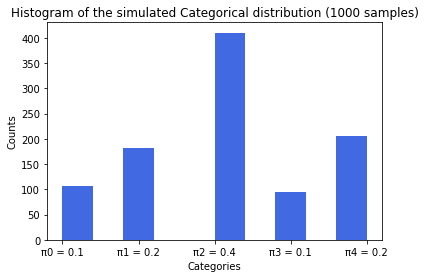

In [ ]:
categorical_probabilities = (0.1, 0.2, 0.4, 0.1, 0.2)
cat_dist = categorical(probabilities=categorical_probabilities, num_samples=1000)
_ = plt.hist(cat_dist, label="Categories", color=plot_color)
xtick_labels = [f"π{i} = {p}" for i, p in enumerate(categorical_probabilities)]
_ = plt.xticks(range(len(categorical_probabilities)), xtick_labels)
_ = plt.xlabel("Categories")
_ = plt.ylabel("Counts")

_ = plt.title("Histogram of the simulated Categorical distribution (1000 samples)")
# _ = plt.legend()

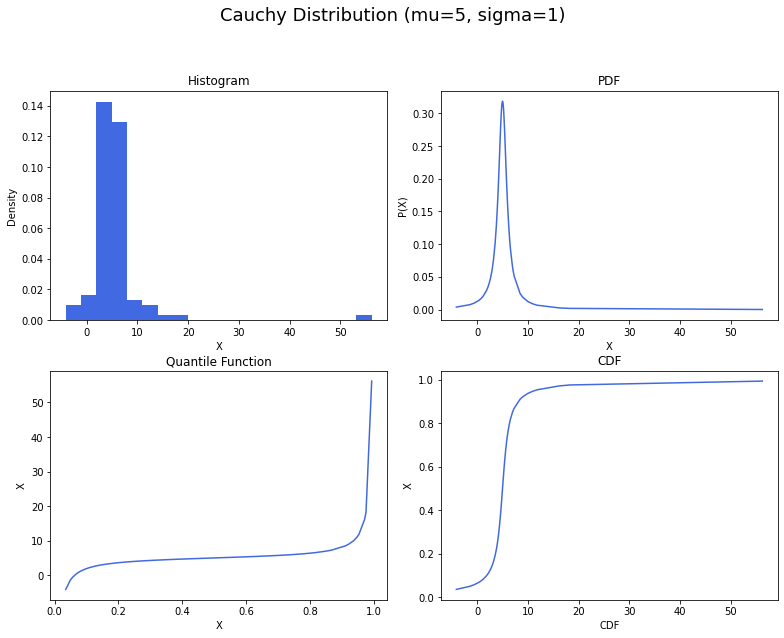

In [ ]:
cauchy = Cauchy(mu=5, sigma=1, num_samples=100)
cauchy_dist = cauchy.get_dist()
order = np.argsort(cauchy.uniform)

fig, ax = plt.subplots(2, 2, figsize=(11, 9))
fig.suptitle("Cauchy Distribution (mu=5, sigma=1)", size=18)
_ = ax[0][0].hist(cauchy_dist, orientation='vertical', bins=20, density=True, color=plot_color)
_ = ax[0][0].set_title('Histogram')
_ = ax[0][0].set_xlabel('X')
_ = ax[0][0].set_ylabel('Density')

_ = ax[0][1].plot(cauchy_dist[order], cauchy.get_pdf()[order], label='pdf', color=plot_color)
_ = ax[0][1].set_title('PDF')
_ = ax[0][1].set_xlabel('X')
_ = ax[0][1].set_ylabel('P(X)')

_ = ax[1][0].plot(cauchy.uniform[order], cauchy_dist[order], label='Quantile Function', color=plot_color)
_ = ax[1][0].set_title('Quantile Function')
_ = ax[1][0].set_xlabel('X')
_ = ax[1][0].set_ylabel('X')

_ = ax[1][1].plot(cauchy_dist[order], cauchy.get_cdf()[order], label='CDF', color=plot_color)
_ = ax[1][1].set_title('CDF')
_ = ax[1][1].set_xlabel('CDF')
_ = ax[1][1].set_ylabel('X')
fig.tight_layout()
fig.subplots_adjust(top=0.85)

## Problem 3 - Box-Muller Algorithm

In [ ]:
class Box_Muller:
  def __init__(self, mu: float, sigma: float, 
               num_samples: int = 100, uniform_range: Tuple = (0, 1)) -> None:
    # Ensure sigma is positive
    assert sigma > 0
    self.mu = mu
    self.sigma = sigma
    self.x = None
    self.y = None
    # Generate unifrom distribution in the desired range. Default: [0, 1]
    self.uniform_u1 = np.random.uniform(*uniform_range, size=num_samples)
    self.uniform_u2 = np.random.uniform(*uniform_range, size=num_samples)

  def get_x_y(self) -> np.ndarray:
    """ Box_Muller distributions """
    # Calculate x and y
    left_term = self.sigma*np.sqrt(-2*np.log(self.uniform_u1))
    deg = 2*np.pi*self.uniform_u2
    self.x = self.mu + left_term * np.cos(deg)
    self.y = self.mu + left_term * np.sin(deg)

    return self.x, self.y

  def get_pdfs(self) -> Tuple[np.ndarray, np.ndarray]:
    """ Get pdfs of x and y """
    if self.x is None or self.y is None:
      self.get_x_y
    pdf_x = np.exp(-0.5*((self.x - self.mu)/(self.sigma))**2)/(np.sqrt(2*np.pi)*self.sigma)
    pdf_y = np.exp(-0.5*((self.y - self.mu)/(self.sigma))**2)/(np.sqrt(2*np.pi)*self.sigma)

    return pdf_x, pdf_y


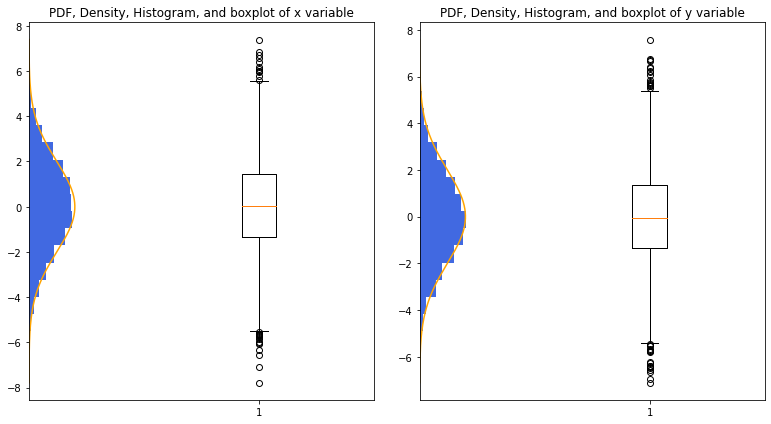

In [ ]:
mu = 0
sigma = 2
box_muller = Box_Muller(mu=mu, sigma=sigma, num_samples=5000)

x, y = box_muller.get_x_y()
order_x = np.argsort(x)
order_y = np.argsort(y)
pdf_x, pdf_y = box_muller.get_pdfs()

fig, ax = plt.subplots(1, 2, figsize=(11, 6))
_ = ax[0].set_title("PDF, Density, Histogram, and boxplot of x variable")
_ = ax[0].hist(x, density=True, orientation='horizontal', bins=20, color=plot_color)
_ = ax[0].plot(pdf_x[order_x], x[order_x], color='orange')
_ = ax[0].boxplot(x)
_ = ax[1].set_title("PDF, Density, Histogram, and boxplot of y variable")
_ = ax[1].hist(y, density=True, orientation='horizontal', bins=20, color=plot_color)
_ = ax[1].plot(pdf_y[order_y], y[order_y], color='orange')
_ = ax[1].boxplot(y)
fig.tight_layout()

## Problem 4 - Spectroscopic Experiments

In [ ]:
class EMG:
  mu: float = 0.0

  def __init__(self, calibration_data: np.ndarray, experiment_data: np.ndarray, 
               num_samples: int = 100) -> None:
    """ This class assumes mu=0 """
    self.sigma = None
    self.variance = None
    self.lambda_ = None
    self.y = None
    # The two datasets
    self.calibration_data = calibration_data
    self.experiment_data = experiment_data
    self.concat_data = np.concatenate((self.experiment_data, self.calibration_data))

  def calculate_sigma(self) -> float:
    """ Calculate sigma for calibration data based on the derived equation. """
    self.variance = np.sum(self.calibration_data**2)/self.calibration_data.shape[0]
    self.sigma = np.sqrt(self.variance)

    return self.sigma

  def lambda_log_likelihhod(self, lambda_):
    """ The function to minimize. """

    N = self.concat_data.shape[0]

    last_term_num = self.sigma*np.sqrt(2)*np.exp((lambda_*(self.sigma**2)/(np.sqrt(2)*self.sigma)))
    last_term_den = erfc(lambda_*self.sigma**2/np.sqrt(2))
    last_term = -last_term_num/last_term_den
    log_likelihood = N/lambda_+N*self.sigma**2*lambda_-np.sum(self.concat_data)+np.prod(last_term)    

    return log_likelihood

  def calculate_lambda(self, starting_value: float) -> float:
    """ Calculate lambda for calibration data based on the derived equation. """
    if self.sigma is None:
      self.calculate_sigma()
    self.lambda_ = fmin(self.lambda_log_likelihhod, starting_value)[0]
    return self.lambda_


  def get_joint_pdf(self) -> np.array:
    """ Get the joint pdf pf I = Exponential + Normal """
    if self.sigma is None:
      self.calculate_sigma()
    if self.lambda_ is None:
      self.calculate_lambda()
      
    first_term = 0.5*self.lambda_*np.exp( 0.5*(self.lambda_*self.sigma)**2-self.lambda_*self.concat_data)
    second_term = erfc( (self.lambda_*self.sigma**2-self.concat_data) / (np.sqrt(2)*self.sigma) )
    return first_term*second_term

  def get_exponential_pdf(self) -> np.ndarray:
    """ Exponential Distribution """
    exponential_pdf = self.lambda_*np.exp(-self.lambda_*self.experiment_data)

    return exponential_pdf

  def get_normal_pdf(self) -> np.ndarray:
    """ Normal Distribution """
    if self.sigma is None:
      self.calculate_sigma()
    normal_pdf = 1/(self.sigma*np.sqrt(2*np.pi))*np.exp(-0.5*(self.calibration_data/self.sigma)**2)

    return normal_pdf

In [ ]:
emg = EMG(calibration_data=tttr_calibration_w.flatten(), 
          experiment_data=tttr_experiment_w.flatten(),
          num_samples=200)
emg.calculate_sigma()
print("Error Variance: ", emg.variance)
print("Error Sigma: ", emg.sigma)


Error Variance:  1.6581294196331147
Error Sigma:  1.2876837420861982


In [ ]:
emg.calculate_lambda(1)
print("Lambda ", emg.lambda_)

Optimization terminated successfully.
         Current function value: 32607.027172
         Iterations: 14
         Function evaluations: 28
Lambda  0.7778808593749997


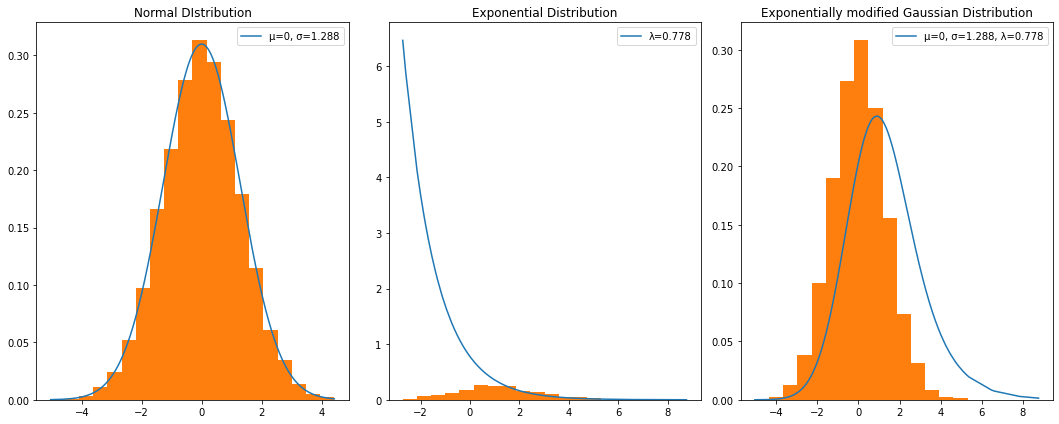

In [ ]:
# Plot the pdfs+histograms of w, d, and r
calibration_order = np.argsort(emg.calibration_data)
experiment_order = np.argsort(emg.experiment_data)
concat_order = np.argsort(emg.concat_data)
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Normal
_ = ax[0].set_title("Normal DIstribution")
n_label = f"μ=0, σ={emg.sigma:.3f}"
_ = ax[0].plot(emg.calibration_data[calibration_order], 
               emg.get_normal_pdf()[calibration_order], 
               label=n_label)
_ = ax[0].hist(emg.calibration_data, density=True, bins=20)
ax[0].legend()
# Exponential
e_label = f"λ={emg.lambda_:.3f}"
_ = ax[1].set_title("Exponential Distribution")
_ = ax[1].plot(emg.experiment_data[experiment_order], 
               emg.get_exponential_pdf()[experiment_order], 
               label=e_label)
_ = ax[1].hist(emg.experiment_data, density=True, bins=20)
ax[1].legend()
# Joint PDF
j_label = f"μ=0, σ={emg.sigma:.3f}, λ={emg.lambda_:.3f}"
_ = ax[2].set_title("Exponentially modified Gaussian Distribution")
_ = ax[2].plot(emg.concat_data[concat_order], 
               emg.get_joint_pdf()[concat_order], 
               label=j_label)
_ = ax[2].hist(emg.concat_data, density=True, bins=20)
ax[2].legend()
fig.tight_layout()